### Falcon Plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [ ]:
# Load the data

df_bad = pd.read_csv('BFI44-F7bI-B.csv')
df_good=pd.read_csv('BFI44-F7bI-G.csv')
df_neutral=pd.read_csv('BFI44-F7bI-N.csv')

In [2]:
df_bad.head()

,Persona,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
0,2 Pistols,3.375,3.000,3.000,2.750,3.4
1,Abdelhamid Abaaoud,3.250,2.778,3.556,2.750,2.6
2,Abdolmalek Rigi,3.000,3.667,2.333,2.875,3.2
3,Abdulaziz al-Omari,2.500,2.444,3.111,3.250,3.3
4,Abdullah Ahmed Abdullah,2.500,3.778,3.444,3.375,3.0


In [3]:
df_good.head()

,Persona,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
0,A. T. Ariyaratne,2.625,3.333,4.000,3.250,3.2
1,A.H.M. Noman Khan,3.875,3.333,3.778,2.750,3.4
2,Abdon Nababan,4.000,2.556,2.667,2.750,2.9
3,Abdul Razak Hussein,3.250,2.778,3.333,3.625,2.8
4,Abdul Samad Ismail,3.125,4.000,3.556,3.250,3.4


In [4]:
df_neutral.head()

,Persona,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
0,50 Cent,2.500,3.889,3.889,3.000,4.0
1,A. A. Milne,2.875,3.111,3.111,3.250,3.1
2,Abdelkader El Djezairi,2.625,3.333,3.111,3.250,3.6
3,Ada Yonath,2.875,3.111,2.889,3.125,3.7
4,Agnez Mo,2.625,3.778,1.889,2.875,3.0


In [2]:
df_list=[df_bad, df_good, df_neutral]

In [3]:
columns_list = ['Extraversion',	'Agreeableness',	'Conscientiousness',	'Neuroticism',	'Openness']
custom_names = ['Bad','Good','In-between']
# Create a list to store the results
results = []

# Iterate through the DataFrames
for df, name in zip(df_list, custom_names):
    for col in columns_list:
        # Calculate mean and std for col1
        mean = df[col].mean()
        std = df[col].std()
        
        # Append the results to the list
        results.append({
            'DataFrame': name,
            'Attribute':col,
            'Mean': mean,
            'Std': std
        })
#print(results)

# Create a new DataFrame from the results
cdf = pd.DataFrame(results)
#print("§§§§§§§§§§§§§§§§§")
#print(cdf)
# Set 'DataFrame' as the index for easier reading
#cdf.set_index('DataFrame', inplace=True)
#print("&&&&&&&&&&&&&&&&&&&&&&&&")
# Display the comparison DataFrame
print(cdf)


     DataFrame          Attribute      Mean       Std
0          Bad       Extraversion  3.086409  0.494696
1          Bad      Agreeableness  3.103157  0.476696
2          Bad  Conscientiousness  3.080532  0.461645
3          Bad        Neuroticism  2.901007  0.472538
4          Bad           Openness  3.124161  0.448513
5         Good       Extraversion  3.108899  0.462182
6         Good      Agreeableness  3.129867  0.454247
7         Good  Conscientiousness  3.122300  0.456362
8         Good        Neuroticism  2.894028  0.514002
9         Good           Openness  3.136300  0.442590
10  In-between       Extraversion  3.139773  0.518379
11  In-between      Agreeableness  3.176264  0.476765
12  In-between  Conscientiousness  3.126759  0.468068
13  In-between        Neuroticism  2.862784  0.491340
14  In-between           Openness  3.145455  0.458310


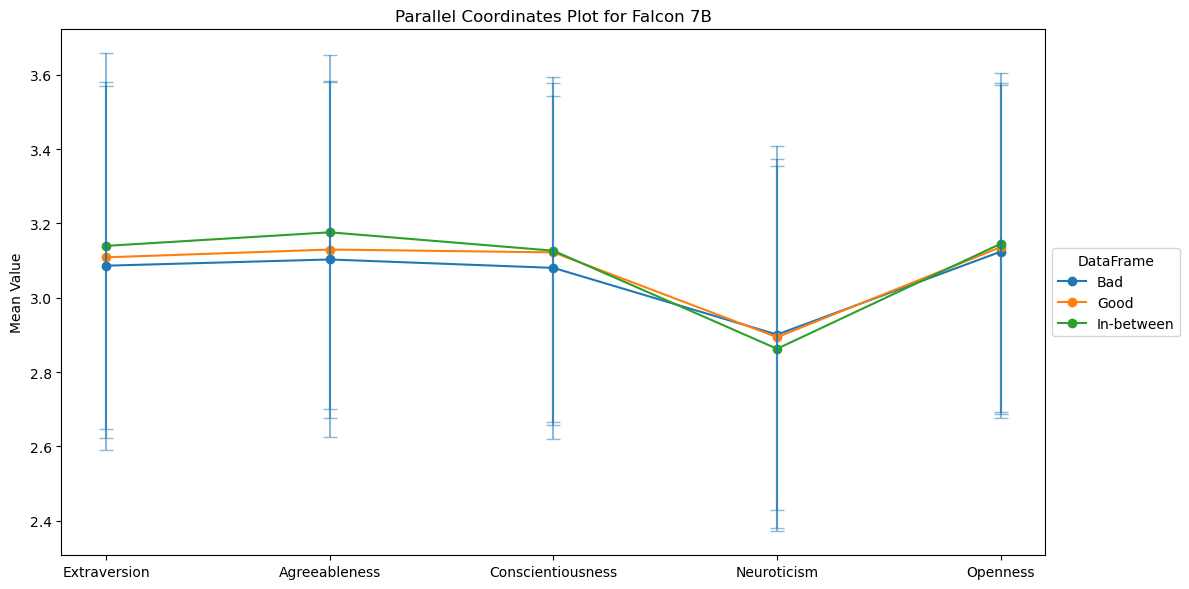

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming cdf is your DataFrame with the results

# Identify the unique DataFrames and Columns
dataframes = cdf['DataFrame'].unique()
columns = cdf['Attribute'].unique()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each DataFrame
for df_name in dataframes:
    df_data = cdf[cdf['DataFrame'] == df_name]
    ax.plot(df_data['Attribute'], df_data['Mean'], marker='o', label=df_name)

# Customize the plot
ax.set_xticks(range(len(columns)))
ax.set_xticklabels(columns)
ax.set_ylabel('Mean Value')
ax.set_title('Parallel Coordinates Plot for Falcon 7B')
ax.legend(title='DataFrame', loc='center left', bbox_to_anchor=(1, 0.5))
#ax.set_facecolor('lightgrey') 
# Add error bars for standard deviation
for df_name in dataframes:
    df_data = cdf[cdf['DataFrame'] == df_name]
    ax.errorbar(df_data['Attribute'], df_data['Mean'], yerr=df_data['Std'], 
                fmt='none', capsize=5, alpha=0.5)

plt.tight_layout()
plt.show()

In [17]:
cdf.head()

,DataFrame,Attribute,Mean,Std
0,Bad,Extraversion,3.086409,0.494696
1,Bad,Agreeableness,3.103157,0.476696
2,Bad,Conscientiousness,3.080532,0.461645
3,Bad,Neuroticism,2.901007,0.472538
4,Bad,Openness,3.124161,0.448513


In [21]:
# Pivot the data
cdf_pivot = cdf.pivot(index='DataFrame', columns='Attribute', values='Mean')

# Add a column with the row names at the end to close the radar chart
cdf_pivot['DataFrame'] = cdf_pivot.index
cdf_pivot = cdf_pivot.reset_index(drop=True)
print(cdf_pivot)
# Get the traits to be used as labels
attributes = list(cdf_pivot.columns[:-1])

# Number of variables (attributes)
N = len(attributes)

# Compute angle for each attribute (spoke on radar chart)
angles = [n / float(N) * 2 * 3.14 for n in range(N)]
angles += angles[:1]  # Complete the loop to create a circular graph


Attribute  Agreeableness  Conscientiousness  Extraversion  Neuroticism  \
0               3.103157           3.080532      3.086409     2.901007   
1               3.129867           3.122300      3.108899     2.894028   
2               3.176264           3.126759      3.139773     2.862784   

Attribute  Openness   DataFrame  
0          3.124161         Bad  
1          3.136300        Good  
2          3.145455  In-between  


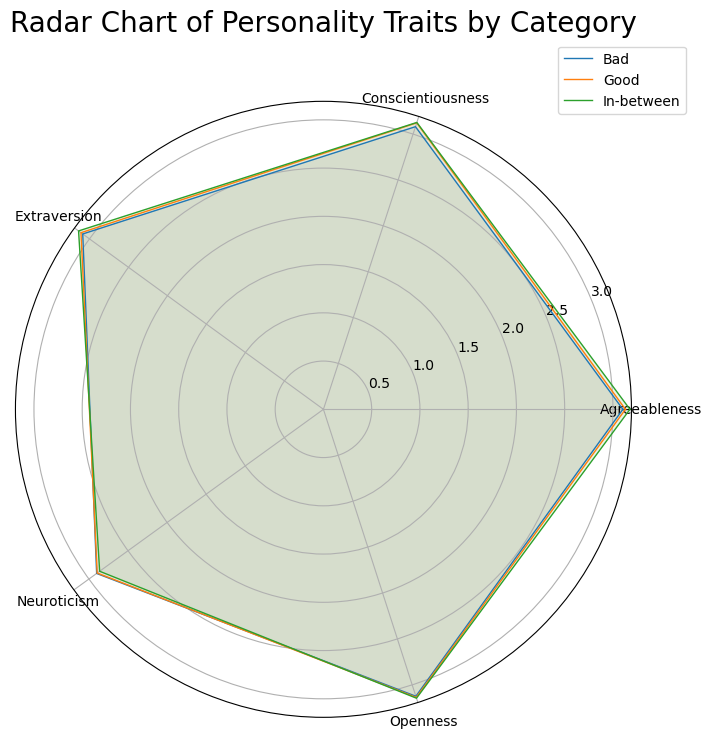

In [22]:
# Initialize the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Function to add data to radar chart
def add_to_radar(values, label):
    values += values[:1]  # Close the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=label)
    ax.fill(angles, values, alpha=0.1)  # Fill color

# Add each category to the radar chart
for i, row in cdf_pivot.iterrows():
    add_to_radar(row[:-1].tolist(), row['DataFrame'])

# Add labels and other formatting
plt.xticks(angles[:-1], attributes)
plt.title('Radar Chart of Personality Traits by Category', size=20, color='black', y=1.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the radar chart
plt.show()


KeyError: "['Persona'] not found in axis"

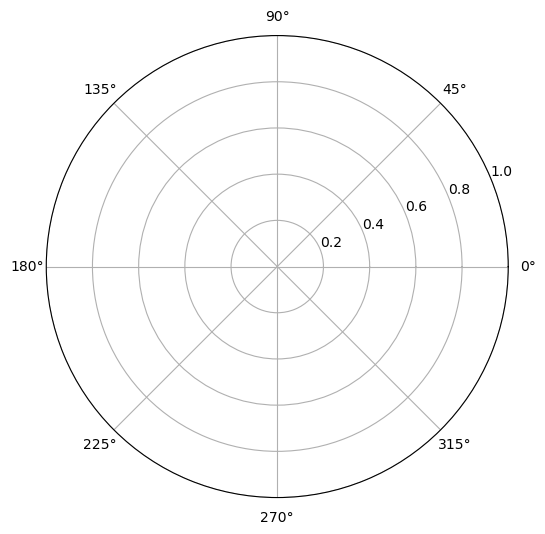

In [19]:
def radar_chart(df):
    # Number of variables
    categories = list(df.columns)[1:]
    N = len(categories)
    
    # Create a figure and polar axes
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='polar'))
    
    # Angle of each axis
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    # Plot data
    for i, person in df.iterrows():
        values = person.drop('Persona').values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=person['Persona'])
        ax.fill(angles, values, alpha=0.1)
    
    # Set category labels
    plt.xticks(angles[:-1], categories)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    plt.title("Personality Traits Radar Chart")
    plt.tight_layout()
    plt.show()

radar_chart(cdf)  # Plot for first 5 people

### LLama Plots

In [11]:
#df_bad = pd.read_csv('bfi_L_B.csv')
df_good=pd.read_csv('bfi_L_G.csv')
df_neutral=pd.read_csv('bfi_L_N.csv')

In [12]:
df_list=[df_good, df_neutral]

In [15]:
columns_list = ['Extraversion',	'Agreeableness',	'Conscientiousness',	'Neuroticism',	'Openness']
custom_names = ['Good','In-between']
# Create a list to store the results
results = []

# Iterate through the DataFrames
for df, name in zip(df_list, custom_names):
    for col in columns_list:
        # Calculate mean and std for col1
        mean = df[col].mean()
        std = df[col].std()
        
        # Append the results to the list
        results.append({
            'DataFrame': name,
            'Attribute':col,
            'Mean': mean,
            'Std': std
        })
#print(results)

# Create a new DataFrame from the results
cdf = pd.DataFrame(results)
#print("§§§§§§§§§§§§§§§§§")
#print(cdf)
# Set 'DataFrame' as the index for easier reading
#cdf.set_index('DataFrame', inplace=True)
#print("&&&&&&&&&&&&&&&&&&&&&&&&")
# Display the comparison DataFrame
print(cdf)

    DataFrame          Attribute     Mean       Std
0        Good       Extraversion  3.59375  0.386608
1        Good      Agreeableness  4.05000  0.485788
2        Good  Conscientiousness  4.14435  0.346048
3        Good        Neuroticism  2.79375  0.269853
4        Good           Openness  4.09000  0.197084
5  In-between       Extraversion  3.46875  0.366964
6  In-between      Agreeableness  3.75005  0.356613
7  In-between  Conscientiousness  4.09430  0.498690
8  In-between        Neuroticism  2.70000  0.387723
9  In-between           Openness  4.23500  0.366024


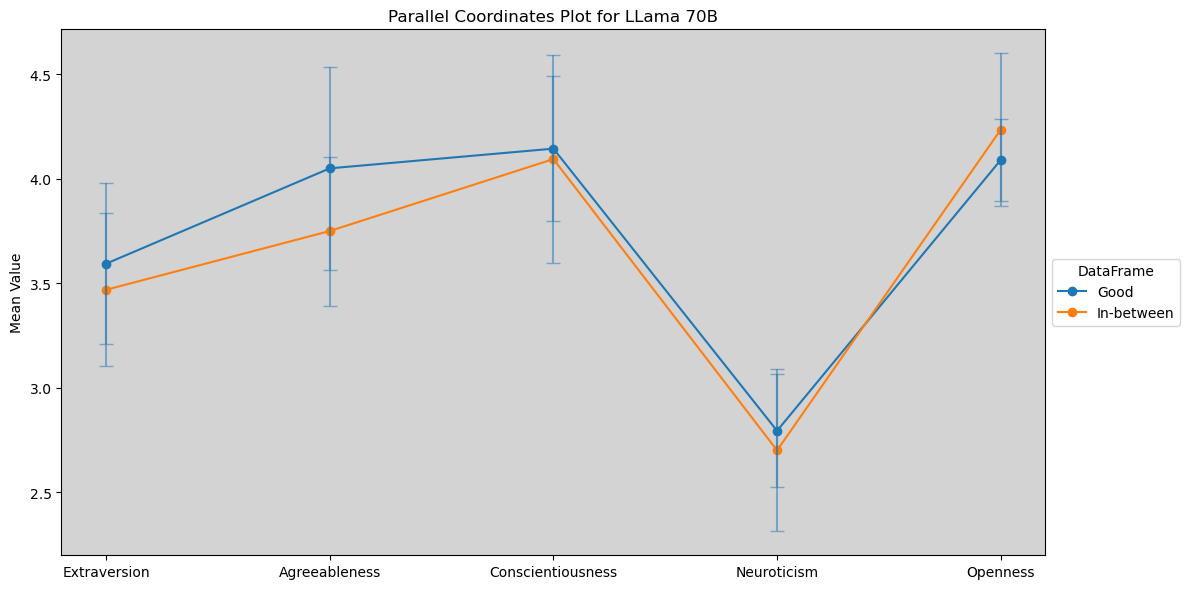

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming cdf is your DataFrame with the results

# Identify the unique DataFrames and Columns
dataframes = cdf['DataFrame'].unique()
columns = cdf['Attribute'].unique()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each DataFrame
for df_name in dataframes:
    df_data = cdf[cdf['DataFrame'] == df_name]
    ax.plot(df_data['Attribute'], df_data['Mean'], marker='o', label=df_name)

# Customize the plot
ax.set_xticks(range(len(columns)))
ax.set_xticklabels(columns)
ax.set_ylabel('Mean Value')
ax.set_title('Parallel Coordinates Plot for LLama 70B')
ax.legend(title='DataFrame', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_facecolor('lightgrey') 
# Add error bars for standard deviation
for df_name in dataframes:
    df_data = cdf[cdf['DataFrame'] == df_name]
    ax.errorbar(df_data['Attribute'], df_data['Mean'], yerr=df_data['Std'], 
                fmt='none', capsize=5, alpha=0.5)

plt.tight_layout()
plt.show()

### Plots for Claude

In [19]:
#df_bad = pd.read_csv('bfi_C_B.csv')
df_good=pd.read_csv('bfi_C_G.csv')
df_neutral=pd.read_csv('bfi_C_N.csv')

In [20]:
df_list=[df_good, df_neutral]

In [21]:
columns_list = ['Extraversion',	'Agreeableness',	'Conscientiousness',	'Neuroticism',	'Openness']
custom_names = ['Good','In-between']
# Create a list to store the results
results = []

# Iterate through the DataFrames
for df, name in zip(df_list, custom_names):
    for col in columns_list:
        # Calculate mean and std for col1
        mean = df[col].mean()
        std = df[col].std()
        
        # Append the results to the list
        results.append({
            'DataFrame': name,
            'Attribute':col,
            'Mean': mean,
            'Std': std
        })
#print(results)

# Create a new DataFrame from the results
cdf = pd.DataFrame(results)
#print("§§§§§§§§§§§§§§§§§")
#print(cdf)
# Set 'DataFrame' as the index for easier reading
#cdf.set_index('DataFrame', inplace=True)
#print("&&&&&&&&&&&&&&&&&&&&&&&&")
# Display the comparison DataFrame
print(cdf)

    DataFrame          Attribute      Mean       Std
0        Good       Extraversion  4.066667  0.330269
1        Good      Agreeableness  4.274067  0.593752
2        Good  Conscientiousness  4.392600  0.290667
3        Good        Neuroticism  2.333333  0.421696
4        Good           Openness  4.400000  0.236039
5  In-between       Extraversion  3.882812  0.535157
6  In-between      Agreeableness  3.916688  0.383759
7  In-between  Conscientiousness  4.201437  0.376720
8  In-between        Neuroticism  2.742188  0.374913
9  In-between           Openness  4.593750  0.345386


    DataFrame          Attribute      Mean       Std
0        Good       Extraversion  4.066667  0.330269
1        Good      Agreeableness  4.274067  0.593752
2        Good  Conscientiousness  4.392600  0.290667
3        Good        Neuroticism  2.333333  0.421696
4        Good           Openness  4.400000  0.236039
5  In-between       Extraversion  3.882812  0.535157
6  In-between      Agreeableness  3.916688  0.383759
7  In-between  Conscientiousness  4.201437  0.376720
8  In-between        Neuroticism  2.742188  0.374913
9  In-between           Openness  4.593750  0.345386


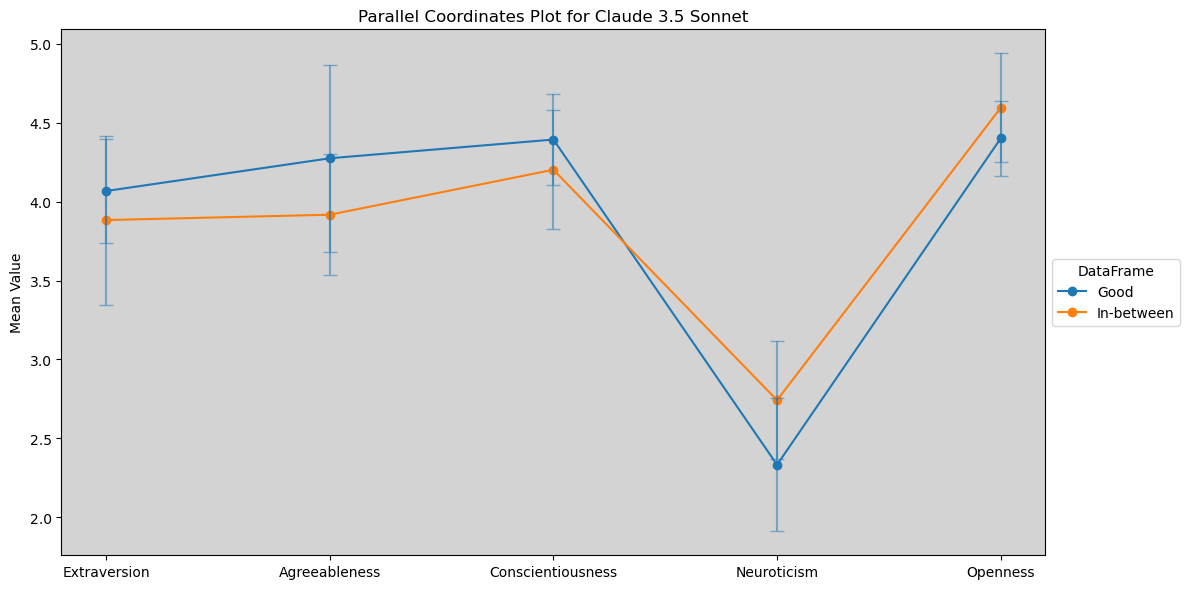

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming cdf is your DataFrame with the results

# Identify the unique DataFrames and Columns
dataframes = cdf['DataFrame'].unique()
columns = cdf['Attribute'].unique()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each DataFrame
for df_name in dataframes:
    df_data = cdf[cdf['DataFrame'] == df_name]
    ax.plot(df_data['Attribute'], df_data['Mean'], marker='o', label=df_name)

# Customize the plot
ax.set_xticks(range(len(columns)))
ax.set_xticklabels(columns)
ax.set_ylabel('Mean Value')
ax.set_title('Parallel Coordinates Plot for Claude 3.5 Sonnet')
ax.legend(title='DataFrame', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_facecolor('lightgrey') 
# Add error bars for standard deviation
for df_name in dataframes:
    df_data = cdf[cdf['DataFrame'] == df_name]
    ax.errorbar(df_data['Attribute'], df_data['Mean'], yerr=df_data['Std'], 
                fmt='none', capsize=5, alpha=0.5)

plt.tight_layout()
plt.show()

### Plots for GPT

In [7]:
df_bad = pd.read_csv('bfi_Gpt_B.csv')
df_good=pd.read_csv('bfi_Gpt_G.csv')
df_neutral=pd.read_csv('bfi_Gpt_N.csv')

In [8]:
df_list=[df_bad, df_good, df_neutral]

In [9]:
df_good['Extraversion'].describe()

count    15.000000
mean      3.766667
std       0.455293
min       3.250000
25%       3.437500
50%       3.750000
75%       3.937500
max       5.000000
Name: Extraversion, dtype: float64

In [10]:
columns_list = ['Extraversion',	'Agreeableness',	'Conscientiousness',	'Neuroticism',	'Openness']
custom_names = ['Bad','Good','In-between']
# Create a list to store the results
results = []

# Iterate through the DataFrames
for df, name in zip(df_list, custom_names):
    for col in columns_list:
        # Calculate mean and std for col1
        mean = df[col].mean()
        std = df[col].std()
        
        # Append the results to the list
        results.append({
            'DataFrame': name,
            'Attribute':col,
            'Mean': mean,
            'Std': std
        })
#print(results)

# Create a new DataFrame from the results
cdf = pd.DataFrame(results)
#print("§§§§§§§§§§§§§§§§§")
#print(cdf)
# Set 'DataFrame' as the index for easier reading
#cdf.set_index('DataFrame', inplace=True)
#print("&&&&&&&&&&&&&&&&&&&&&&&&")
# Display the comparison DataFrame
print(cdf)


     DataFrame          Attribute      Mean       Std
0          Bad       Extraversion  3.941667  0.654426
1          Bad      Agreeableness  3.037133  0.605166
2          Bad  Conscientiousness  4.274067  0.335617
3          Bad        Neuroticism  2.516667  0.258199
4          Bad           Openness  4.113333  0.274816
5         Good       Extraversion  3.766667  0.455293
6         Good      Agreeableness  4.555600  0.288009
7         Good  Conscientiousness  4.392600  0.221893
8         Good        Neuroticism  2.325000  0.365352
9         Good           Openness  4.293333  0.276371
10  In-between       Extraversion  3.775000  0.334744
11  In-between      Agreeableness  4.237000  0.261876
12  In-between  Conscientiousness  4.274200  0.384648
13  In-between        Neuroticism  2.433333  0.349957
14  In-between           Openness  4.566667  0.284521


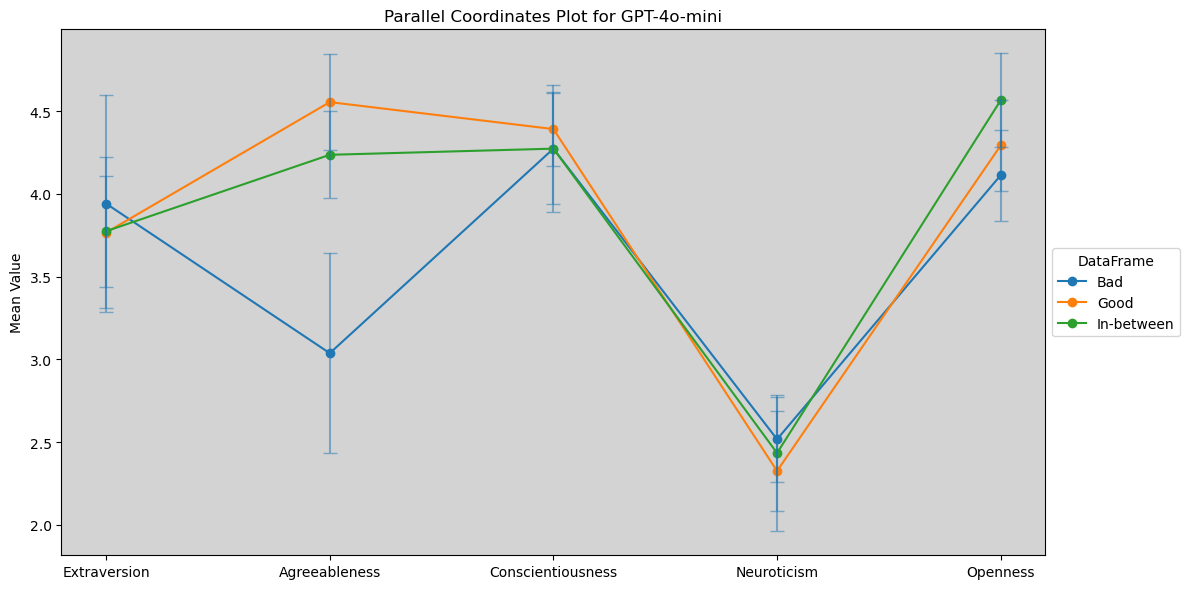

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming cdf is your DataFrame with the results

# Identify the unique DataFrames and Columns
dataframes = cdf['DataFrame'].unique()
columns = cdf['Attribute'].unique()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each DataFrame
for df_name in dataframes:
    df_data = cdf[cdf['DataFrame'] == df_name]
    ax.plot(df_data['Attribute'], df_data['Mean'], marker='o', label=df_name)

# Customize the plot
ax.set_xticks(range(len(columns)))
ax.set_xticklabels(columns)
ax.set_ylabel('Mean Value')
ax.set_title('Parallel Coordinates Plot for GPT-4o-mini')
ax.legend(title='DataFrame', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_facecolor('lightgrey') 
# Add error bars for standard deviation
for df_name in dataframes:
    df_data = cdf[cdf['DataFrame'] == df_name]
    ax.errorbar(df_data['Attribute'], df_data['Mean'], yerr=df_data['Std'], 
                fmt='none', capsize=5, alpha=0.5)

plt.tight_layout()
plt.show()